# Adaptive Intelligence COM3240

## Lab 4: PCA on the reduced MNIST database

### Learning Outcomes
- Gain further experience on PCA. 
- Apply PCA on a more complex dataset.
- Preparation for assignment 1.

### Exercise
Your task is to perform a Principle Component Analysis on a reduced data set of hand written digits, from the MNIST database http://yann.lecun.com/exdb/mnist/. The data set is available in csv format from the course web page page. The patterns pro vided are 28x28 images and you need reshape the vectors in the dataset in order to see an individual digit. To visualise multiple data points of a high dimensionality simultaneously, it is required to perform PCA and keep, for example, the four most important components and discard the others. This will allow you to plot 3D combinations of them and decide which is more informative for distinguishing the clusters that are formed. To facilitate visualisation, you may use the labels of the data and show only 5 digits in the graph (e.g 0, 2, 4, 7, 8). Use a different colour for every digit. 

**Note:** this is for didactic purposes; normally data are not labeled. 

You will need to produce the following:
1. A 3D figure of the transformed data with the 1st, 2nd and 3rd PC as axes.
2. A 3D figure of the transformed data with the 1st, 2nd and 4th PC as axes.
3. A 3D figure of the transformed data with the 2nd, 3rd and 4th PC as axes.
4. Also, comment on the most informative combination by pointing out the clusters of the data.

#### Further clarifications
For your implementation, you may of course use standard mathematical tools (such as finding the eigenvectors), but not a ready-made PCA module (though you may use it to compare results). In finding the principle components, please note that depending on the machine you are using or the accuracy of your calculations you may get the PC vectors with an opposite sign. This is not a problem as both solutions are totally equivalent.

In [36]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import gzip
%matplotlib inline

In [44]:
## load the dataset
train = np.genfromtxt ('digits/train.csv', delimiter=",")
trainlabels = np.genfromtxt ('digits/trainlabels.csv', delimiter=",")

[n,m]=np.shape(train)  # number of pixels and number of training data
#n = 784 = 28x28 pixels
#m = 5000 (images)

"""file_name = 'train-images-idx3-ubyte'
train_data = gzip.GzipFile(file_name+'.gz', 'rb')
train_content = train_data.read()

pixels = 28
train_block = list(train_content[16:])
train = np.reshape(train_block, (-1, pixels*pixels))
train = train[:5000]


train_labels_file = gzip.GzipFile('train-labels-idx1-ubyte.gz','rb')
train_labels_data = train_labels_file.read()
trainlabels = list(train_labels_data[8:])
trainlabels = np.array(trainlabels[:5000])"""


"file_name = 'train-images-idx3-ubyte'\ntrain_data = gzip.GzipFile(file_name+'.gz', 'rb')\ntrain_content = train_data.read()\n\npixels = 28\ntrain_block = list(train_content[16:])\ntrain = np.reshape(train_block, (-1, pixels*pixels))\ntrain = train[:5000]\n\n\ntrain_labels_file = gzip.GzipFile('train-labels-idx1-ubyte.gz','rb')\ntrain_labels_data = train_labels_file.read()\ntrainlabels = list(train_labels_data[8:])\ntrainlabels = np.array(trainlabels[:5000])"

#### How to visualize a digit 

[[ 0.         0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.         0.         0.         0.
   0.         0.         0.  

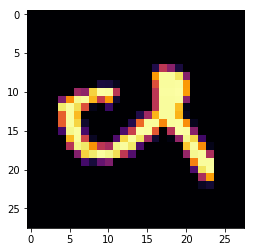

In [47]:
pixels = 28
i = 2 # 1 up to m

# reshapes the i-th vector with length n into a 28x28 array,order="F"
image = np.reshape(train[:,4999],(pixels,pixels))
print(image)
# vizualize the image
plt.imshow(image, cmap = 'inferno');

### Perform the PCA 

In [48]:
normT = np.sqrt(np.diag(train.T.dot(train)))

train = train / np.matlib.repmat(normT.T,n,1)
data = train.T

# number of Principal Components to save
nPC = 6

PCV = np.zeros((n,nPC))

# Center data around the mean
meanData = np.matlib.repmat(data.mean(axis=0),m,1)
data = data - meanData

# Compute the covariance matrix
C = np.cov(data.T)

# Solve an ordinary or generalized eigenvalue problem
# for a complex Hermitian or real symmetric matrix.
eigen_val, eigen_vec = np.linalg.eigh(C)

# sorting the eigenvalues in descending order
idx = np.argsort(eigen_val)
idx = idx[::-1]
# sorting eigenvectors according to the sorted eigenvalues
eigen_vec = eigen_vec[:,idx]
# sorting eigenvalues
eigen_val = eigen_val[idx]

# save only the most significant eigen vectors
PCV[:,:nPC] = eigen_vec[:,:nPC]

# apply transformation
FinalData = data.dot(PCV)

print(FinalData)


# find indexes of data for each digit
zeroData  = (trainlabels==0).nonzero()
twoData   = (trainlabels==2).nonzero()
fourData  = (trainlabels==4).nonzero()
sevenData = (trainlabels==7).nonzero()
eightData = (trainlabels==8).nonzero()

[[ 0.02232896  0.10326984  0.07947807  0.24978758  0.0516861   0.08742791]
 [-0.21038845  0.30398335 -0.23204914  0.31194515  0.17496237 -0.09569457]
 [-0.29454944  0.00960906 -0.05521956 -0.23007633 -0.02506029  0.03462292]
 ..., 
 [-0.15154534  0.13047265 -0.065614    0.03527998  0.10120234  0.03085278]
 [ 0.48757534  0.02891955  0.02655992  0.12599192 -0.14821736 -0.29998614]
 [ 0.09426808  0.06265612  0.01682895 -0.31256631 -0.11853707  0.0073292 ]]


### Plotting

[ 0.30398335  0.29792629  0.12887695  0.20685018  0.28175224  0.21023882
  0.22387295  0.34454511  0.20611937  0.27093015  0.22306384  0.37113446
  0.23151437  0.30456824  0.23908249  0.3477703   0.30224505  0.45782794
  0.24159543  0.22420873  0.31945793  0.33906175  0.44703284  0.2407937
  0.17109581  0.26428978  0.1135925   0.29975191  0.28067424  0.3385804
  0.07527388  0.43487531  0.42607825  0.32952827  0.38943414  0.26282546
  0.26879536  0.32657265  0.33643335  0.3149332   0.4401943   0.36984771
  0.35188316  0.11670948  0.31405778  0.43525086  0.32909535  0.35478459
  0.26019604  0.13619312  0.197362    0.4475577   0.36727215  0.03915909
  0.29733914  0.18645106  0.11720621  0.15381115  0.22049338  0.27030108
  0.14489517  0.28933236  0.17458634  0.21881222  0.10898983  0.11051028
  0.2530057   0.36038287  0.33743671  0.27451189  0.27135885  0.09148063
  0.37981768  0.33847527  0.21283737 -0.00055637  0.34770459  0.36557784
  0.48857988  0.25259939  0.21389848  0.23941359  0.1

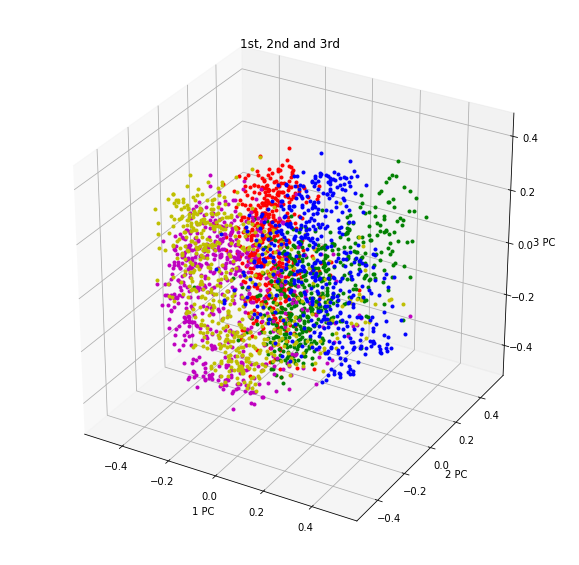

In [13]:
#first second and third PC
fig = plt.figure(figsize = (10, 10))
ax = fig.gca(projection = '3d')

# plot zeros
xcomp = FinalData[zeroData,0].flatten()
ycomp = FinalData[zeroData,1].flatten()
print(ycomp)
zcomp = FinalData[zeroData,2].flatten()
ax.plot(xcomp,ycomp,zcomp,'r.')

# plot twos
xcomp = FinalData[twoData,0].flatten()
ycomp = FinalData[twoData,1].flatten()
zcomp = FinalData[twoData,2].flatten()
ax.plot(xcomp,ycomp,zcomp,'g.')

# plot fours
xcomp = FinalData[fourData,0].flatten()
ycomp = FinalData[fourData,1].flatten()
zcomp = FinalData[fourData,2].flatten()
ax.plot(xcomp,ycomp,zcomp,'m.')

# plot sevens
xcomp = FinalData[sevenData,0].flatten()
ycomp = FinalData[sevenData,1].flatten()
zcomp = FinalData[sevenData,2].flatten()
ax.plot(xcomp,ycomp,zcomp,'y.')

# plot eights
xcomp = FinalData[eightData,0].flatten()
ycomp = FinalData[eightData,1].flatten()
zcomp = FinalData[eightData,2].flatten()
ax.plot(xcomp,ycomp,zcomp,'b.')
ax.set_title('1st, 2nd and 3rd')
ax.set_xlabel('1 PC')
ax.set_ylabel('2 PC')
ax.set_zlabel('3 PC')
plt.show()

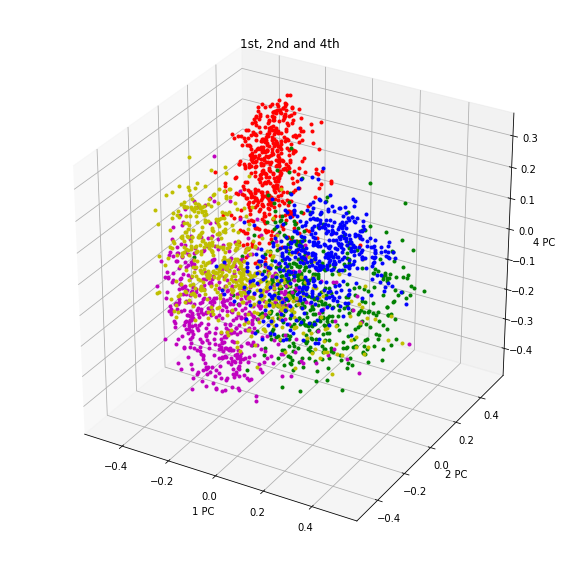

In [6]:
# figure #first second and fourth PC
fig = plt.figure(figsize = (10, 10))
ax = fig.gca(projection = '3d')
# plot zeros
xcomp = FinalData[zeroData,0].flatten()
ycomp = FinalData[zeroData,1].flatten()
zcomp = FinalData[zeroData,3].flatten()
ax.plot(xcomp,ycomp,zcomp,'r.')
# plot twos
xcomp = FinalData[twoData,0].flatten()
ycomp = FinalData[twoData,1].flatten()
zcomp = FinalData[twoData,3].flatten()
ax.plot(xcomp,ycomp,zcomp,'g.')
# plot fours
xcomp = FinalData[fourData,0].flatten()
ycomp = FinalData[fourData,1].flatten()
zcomp = FinalData[fourData,3].flatten()
ax.plot(xcomp,ycomp,zcomp,'m.')
# plot sevens
xcomp = FinalData[sevenData,0].flatten()
ycomp = FinalData[sevenData,1].flatten()
zcomp = FinalData[sevenData,3].flatten()
ax.plot(xcomp,ycomp,zcomp,'y.')
# plot eights
xcomp = FinalData[eightData,0].flatten()
ycomp = FinalData[eightData,1].flatten()
zcomp = FinalData[eightData,3].flatten()
ax.plot(xcomp,ycomp,zcomp,'b.')
ax.set_title('1st, 2nd and 4th')
ax.set_xlabel('1 PC')
ax.set_ylabel('2 PC')
ax.set_zlabel('4 PC')
plt.show()

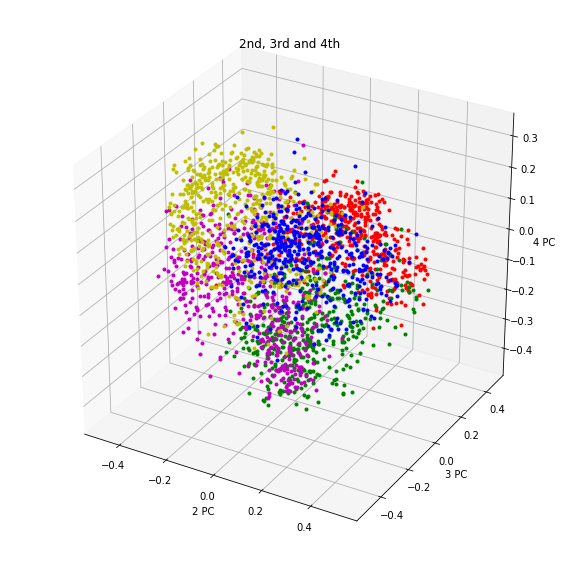

In [7]:
# figure #second third and fourth PC
fig = plt.figure(figsize = (10, 10))
ax = fig.gca(projection = '3d')
# plot zeros
xcomp = FinalData[zeroData,1].flatten()
ycomp = FinalData[zeroData,2].flatten()
zcomp = FinalData[zeroData,3].flatten()
ax.plot(xcomp,ycomp,zcomp,'r.')
# plot twos
xcomp = FinalData[twoData,1].flatten()
ycomp = FinalData[twoData,2].flatten()
zcomp = FinalData[twoData,3].flatten()
ax.plot(xcomp,ycomp,zcomp,'g.')
# plot fours
xcomp = FinalData[fourData,1].flatten()
ycomp = FinalData[fourData,2].flatten()
zcomp = FinalData[fourData,3].flatten()
ax.plot(xcomp,ycomp,zcomp,'m.')
# plot sevens
xcomp = FinalData[sevenData,1].flatten()
ycomp = FinalData[sevenData,2].flatten()
zcomp = FinalData[sevenData,3].flatten()
ax.plot(xcomp,ycomp,zcomp,'y.')
# plot eights
xcomp = FinalData[eightData,1].flatten()
ycomp = FinalData[eightData,2].flatten()
zcomp = FinalData[eightData,3].flatten()
ax.plot(xcomp,ycomp,zcomp,'b.')
ax.set_title('2nd, 3rd and 4th')
ax.set_xlabel('2 PC')
ax.set_ylabel('3 PC')
ax.set_zlabel('4 PC')
plt.show()